<a href="https://colab.research.google.com/github/KrishnaSChavan/MachineLearning/blob/main/Cancer_GAN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google. colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krishnaschavan","key":"6f1c6fc054fb8d6259f3b6411ea6191e"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.19G/5.20G [01:02<00:00, 117MB/s] 
100% 5.20G/5.20G [01:02<00:00, 88.9MB/s]


In [61]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm
from tensorflow.keras import layers

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [7]:
import zipfile
zip_r = zipfile.ZipFile('skin-cancer-mnist-ham10000.zip')
zip_r.extractall()
zip_r.close()

In [120]:
import pandas as pd
data = pd.read_csv('/content/hmnist_28_28_RGB.csv')
y = data['label']
x = data.drop(columns = ['label'])

In [121]:
x = np.array(x).reshape(-1,28,28,3)
x = (x-np.mean(x))/np.std(x)
x_train = x
print('Shape of X :',x.shape)

Shape of X : (10015, 28, 28, 3)


In [102]:
from keras.utils.np_utils import to_categorical
y_test = to_categorical(y, num_classes=7)

In [13]:
x.shape

(10015, 28, 28, 3)

In [ ]:
x[5672, :10, :10]

In [ ]:
plt.imshow(x[1234])

In [20]:
buffer_size = 10015
Batch_size =128

In [21]:
train_dataset = tf.data.Dataset.from_tensor_slices(x).shuffle(buffer_size).batch(Batch_size)

In [81]:
train_dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 3), dtype=tf.float64, name=None)>

In [129]:
def generator_model():
    # model = tf.keras.Sequential()
    # model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    # model.add(layers.BatchNormalization())
    # model.add(layers.LeakyReLU())

    # model.add(layers.Reshape((7, 7, 256)))
    # assert model.output_shape == (None, 7, 7, 256)

    # model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    # assert model.output_shape == (None, 7, 7, 128)
    # model.add(layers.BatchNormalization())
    # model.add(layers.LeakyReLU())

    # model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    # assert model.output_shape == (None, 14, 14, 64)
    # model.add(layers.BatchNormalization())
    # model.add(layers.LeakyReLU())

    # model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    # assert model.output_shape == (None, 28, 28, 3)

    # return model
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 3)

    return model

In [130]:
generator= generator_model()

In [44]:
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12544)             1254400   
                                                                 
 batch_normalization_6 (Batc  (None, 12544)            50176     
 hNormalization)                                                 
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 7, 7, 128)        819200    
 ranspose)                                                       
                                                                 
 batch_normalization_7 (Batc  (None, 7, 7, 128)       

In [131]:
noise = tf.random.normal([1,100])
generated_image = generator (noise,training = False)


generated_image.shape

TensorShape([1, 28, 28, 3])

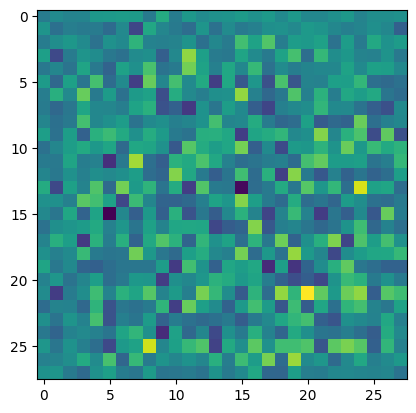

In [132]:
plt.imshow(generated_image[0,:, :, 0])

In [136]:
def discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(7,activation='softmax'))

    return model

In [137]:
discriminator = discriminator_model ()

discriminator.summary()


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 14, 14, 64)        4864      
                                                                 
 leaky_re_lu_72 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 dropout_30 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_73 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 dropout_31 (Dropout)        (None, 7, 7, 128)         0         
                                                                 
 flatten_15 (Flatten)        (None, 6272)            

In [138]:
discriminator = discriminator_model ()
output = discriminator (generated_image)
print (output)

tf.Tensor(
[[0.14276464 0.1418548  0.14352089 0.14332978 0.14312111 0.14238992
  0.14301881]], shape=(1, 7), dtype=float32)


In [139]:
be = tf.keras.losses.SparseCategoricalCrossentropy()
be

In [140]:
def discriminator_loss(real_output, fake_output):
    real_loss = be(tf.ones_like(real_output), real_output)
    fake_loss = be(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [141]:
def generator_loss(fake_output):
    return tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(fake_output), fake_output)

In [142]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [143]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path. join(checkpoint_dir, "ckpt")
checkpoint = tf. train.Checkpoint (generator_optimizer = generator_optimizer,
                                    discriminator_optimizer = discriminator_optimizer,
                                    generator = generator,
                                    discriminator = discriminator)

In [144]:
epochs = 50
noise_dim = 100
num_examples_to_generate = 16
seed = tf. random. normal ( [num_examples_to_generate, noise_dim])

In [145]:
@tf.function
def train_step(images):
    noise = tf.random.normal([Batch_size,noise_dim])
    with tf.GradientTape() as gen_tape , tf.GradientTape() as disc_tape:
        generated_image = generator(noise,training=True)

        real_output = discriminator(images, training = True)
        fake_output = discriminator(generated_image, training = True)

        disc_loss = discriminator_loss (real_output, fake_output)
        gen_loss = generator_loss (fake_output )

    gradients_of_generator = gen_tape.gradient (gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient (disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables) )
    discriminator_optimizer.apply_gradients (zip(gradients_of_discriminator, discriminator.trainable_variables))

    return (gen_loss, disc_loss, tf. reduce_mean (real_output), tf. reduce_mean (fake_output))

In [146]:
def generate_and_plot_images (model, epoch, test_input):

    predictions = model (test_input, training = False)
    fig = plt.figure(figsize = (8, 4))
    for i in range (predictions.shape [0]):
        plt.subplot (4, 4, i+1)
        pred = (predictions[i, :, :, 0] + 1) * 127.5
        pred = np.array (pred)
        plt. imshow (pred.astype (np.uint8))
        plt.axis ('off')
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show ( )

In [147]:
def train(dataset,epochs):
    gen_loss_list = []
    disc_loss_list = []

    real_score_list =[]
    fake_score_list =[]

    for epoch in tqdm(range(epochs)):
        start = time.time ( )
        num_batches = len( dataset)

        print (f'Training started with epoch {epoch + 1} with {num_batches} batches...')

        total_gen_loss = 0
        total_disc_loss = 0
        for batch in dataset:
            generator_loss, discriminator_loss, real_score, fake_score = train_step (batch)
            total_gen_loss += generator_loss
            total_disc_loss += discriminator_loss

        mean_gen_loss = total_gen_loss / num_batches
        mean_disc_loss = total_disc_loss / num_batches

        print ('Losses after epoch %5d: generator %.3f, discriminator %.3f, real score %.2f%%, fake score %.2f%%' %
            (epoch + 1, generator_loss, discriminator_loss, real_score * 100, fake_score * 100))

        generate_and_plot_images (generator, epoch + 1, seed)

        gen_loss_list.append(mean_gen_loss)
        disc_loss_list.append(mean_disc_loss)
        real_score_list.append(real_score)
        fake_score_list.append( fake_score)

        if (epoch + 1) % 10 == 0:
            checkpoint.save (file_prefix = checkpoint_prefix)

    return gen_loss_list, disc_loss_list, real_score_list, fake_score_list

In [148]:
gen_loss_epochs, disc_loss_epochs, real_score_list, fake_score_list = train(train_dataset, epochs = epochs)

  0%|          | 0/50 [00:00<?, ?it/s]

Training started with epoch 1 with 79 batches...


  0%|          | 0/50 [00:00<?, ?it/s]


ValueError: ignored